In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

- 协同过滤

In [3]:
from fastai.collab import *
from fastai.tabular import *

- 获取数据

In [6]:
root = Config.data_path()/'ml-100k'
root
root.ls()

PosixPath('/home/lyc/.fastai/data/ml-100k')

[PosixPath('/home/lyc/.fastai/data/ml-100k/u.genre'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u4.test'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u2.base'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u3.test'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u.info'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u.item'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u3.base'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u.data'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u5.base'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/ua.base'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u2.test'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u1.test'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/README'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/ub.base'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/u.occupation'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/ua.test'),
 PosixPath('/home/lyc/.fastai/data/ml-100k/ub.test'),
 PosixPath('/home/lyc/.fasta

- 评分

In [15]:
ratings = pd.read_csv(root/'u.data', delimiter='\t', header=None, names=['user','item','rating','timestamp'])
ratings.head()
ratings.tail()
len(ratings)

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,user,item,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


100000

- 电影
- 注意这里的编码格式是 latin-1

In [16]:
movies = pd.read_csv(root/'u.item',  delimiter='|', encoding='latin-1', header=None,
                 names=['item', 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()
movies.tail()
len(movies)

,item,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,item,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1682

- 合并表格

In [20]:
rating_movie = ratings.merge(movies[['item', 'title']])  # 按照 item 进行合并
rating_movie.head()

,user,item,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


- 数据束
- 验证集 0.1

In [23]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name='title')
# user_name, item_name and rating_name give the names of the corresponding columns (defaults to the first, the second and the third column

In [25]:
data.show_batch()

user,title,target
378,Heathers (1989),4.0
587,Event Horizon (1997),4.0
5,Addams Family Values (1993),2.0
733,"Pillow Book, The (1995)",3.0
276,Guilty as Sin (1993),1.0


- **为了对输出的范围进行限定，我们应当在输入之后使用一个 sigmoid 函数，最小枝是0.5，最大值是5，但是sigmoid 函数0和1是其渐近线，事实上其达不到1，所以我们的范围应该比最小值小一些，比最大值大一些，这里的放缩范围是 [0, 5.5]**
- 使用权重衰减

In [26]:
y_range = [0, 5.5]

- 学习器创建
- n_factors： width of the embedding matrix

In [88]:
learn = collab_learner(data, n_factors=20, y_range=y_range, wd=1e-1, metrics=rmse)

In [89]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


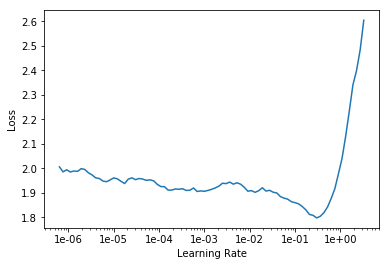

In [90]:
learn.recorder.plot()

In [91]:
lr = 2e-2

In [92]:
learn.fit_one_cycle(7, lr)  # 0.91 baseline

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.973493,0.937407,0.964597,00:04
1,0.988478,0.971373,0.981999,00:04
2,0.981534,0.967845,0.980204,00:04
3,0.924929,0.922627,0.956918,00:03
4,0.807004,0.857399,0.922441,00:03
5,0.750014,0.818383,0.901052,00:04
6,0.602088,0.816817,0.900156,00:04


In [93]:
learn.save('dotprod')

In [95]:
learn.load('dotprod');

In [96]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 20)
  (i_weight): Embedding(1654, 20)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [97]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [20]                 18,880     True      
______________________________________________________________________
Embedding            [20]                 33,080     True      
______________________________________________________________________
Embedding            [1]                  944        True      
______________________________________________________________________
Embedding            [1]                  1,654      True      
______________________________________________________________________

Total params: 54,558
Total trainable params: 54,558
Total non-trainable params: 0

- top

In [99]:
g = rating_movie.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

- 电影偏差

In [108]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [105]:
doc(learn.bias)

bias [source] [test] bias ( arr : Collection , is_item : bool = True ) 
 
 × No tests found for bias . To contribute a test please refer to this guide and this discussion . Bias for item or user (based on is_item ) for all in arr . (Set model to cpu and no grad.) 
 Show in docs

In [113]:
mean_ratings = rating_movie.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [114]:
sorted(movie_ratings, key=lambda o: o[0])[:15] # 评分最低

[(tensor(-0.5611),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.4870),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.4589), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.4420), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.4243), 'Grease 2 (1982)', 2.0),
 (tensor(-0.4213), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.4110), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.3937), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.3895), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.3842), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.3834), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.3619), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.3545), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.3490), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.3471), "McHale's Navy (1997)", 2.188

In [115]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]  # 评分最高

[(tensor(0.8547), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.7953), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.7841), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.7576), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.7515), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.7488), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.7440), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.7348), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.7087), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.7059), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.6833), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.6790), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.6786), 'Wrong Trousers, The (1993)', 4.466101694915254),
 (tensor(0.6765), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.6634), 'Raiders of the Lost Ark (1981)', 4.252380952380952)]

- 权重

In [116]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 20])

In [117]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [120]:
movie_pca.t()
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

tensor([[ 0.3409, -0.1025,  0.9359,  ..., -0.1488, -0.2569, -0.5710],
        [ 0.7058,  0.3820, -0.0237,  ..., -0.3266, -0.3436,  0.0970],
        [-0.5115, -0.1451, -0.1852,  ..., -0.0010,  0.3689,  0.0771]])

- 特征的区别

In [121]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0910), 'Chinatown (1974)'),
 (tensor(0.9887), 'Apocalypse Now (1979)'),
 (tensor(0.9373), 'When We Were Kings (1996)'),
 (tensor(0.9359), 'Fargo (1996)'),
 (tensor(0.9139), 'Casablanca (1942)'),
 (tensor(0.9093),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.8795), 'Clockwork Orange, A (1971)'),
 (tensor(0.8556), 'Godfather, The (1972)'),
 (tensor(0.8467), 'Lawrence of Arabia (1962)'),
 (tensor(0.8320), 'Ran (1985)')]

In [122]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1409), 'Jungle2Jungle (1997)'),
 (tensor(-0.9067), 'Congo (1995)'),
 (tensor(-0.9001), 'Batman & Robin (1997)'),
 (tensor(-0.8861), 'Fire Down Below (1997)'),
 (tensor(-0.8687), 'Volcano (1997)'),
 (tensor(-0.8575), "McHale's Navy (1997)"),
 (tensor(-0.8561), 'Home Alone 3 (1997)'),
 (tensor(-0.8515), 'Ghost and the Darkness, The (1996)'),
 (tensor(-0.8465), 'Shadow Conspiracy (1997)'),
 (tensor(-0.8146), 'Down Periscope (1996)')]

- fac0. fac1

<Figure size 1080x1080 with 0 Axes>

Text(0.340938,0.705768,'Star Wars (1977)')

Text(-0.102525,0.382035,'Contact (1997)')

Text(0.935856,-0.0236502,'Fargo (1996)')

Text(-0.0635445,0.753905,'Return of the Jedi (1983)')

Text(-0.767047,0.223887,'Liar Liar (1997)')

Text(0.339798,0.199404,'English Patient, The (1996)')

Text(-0.299139,0.0623446,'Scream (1996)')

Text(0.0765544,0.513481,'Toy Story (1995)')

Text(-0.643633,0.518164,'Air Force One (1997)')

Text(-0.724267,0.650071,'Independence Day (ID4) (1996)')

Text(0.240344,0.967014,'Raiders of the Lost Ark (1981)')

Text(0.855583,0.152271,'Godfather, The (1972)')

Text(0.729712,-0.184257,'Pulp Fiction (1994)')

Text(0.0920255,-0.160883,'Twelve Monkeys (1995)')

Text(0.531449,0.494251,'Silence of the Lambs, The (1991)')

Text(-0.154609,0.600517,'Jerry Maguire (1996)')

Text(0.592047,-0.0326163,'Chasing Amy (1997)')

Text(-0.433718,0.553702,'Rock, The (1996)')

Text(0.343294,0.630153,'Empire Strikes Back, The (1980)')

Text(-0.248524,0.483882,'Star Trek: First Contact (1996)')

Text(-0.00699195,0.743508,'Back to the Future (1985)')

Text(-0.319019,1.04493,'Titanic (1997)')

Text(-0.453549,0.380424,'Mission: Impossible (1996)')

Text(-0.027387,0.85076,'Fugitive, The (1993)')

Text(-0.207073,0.630275,'Indiana Jones and the Last Crusade (1989)')

Text(0.41777,0.146801,'Willy Wonka and the Chocolate Factory (1971)')

Text(0.449364,0.538911,'Princess Bride, The (1987)')

Text(-0.00120154,0.879214,'Forrest Gump (1994)')

Text(0.739893,0.0951735,'Monty Python and the Holy Grail (1974)')

Text(-0.771854,0.103428,'Saint, The (1997)')

Text(0.448673,-0.00639626,'Full Monty, The (1997)')

Text(-0.0282468,0.402174,'Men in Black (1997)')

Text(0.136911,0.329183,'Terminator, The (1984)')

Text(0.172086,0.674304,'E.T. the Extra-Terrestrial (1982)')

Text(0.684415,-0.0559105,'Dead Man Walking (1995)')

Text(0.46537,0.741848,"Schindler's List (1993)")

Text(0.550693,-0.2028,'Leaving Las Vegas (1995)')

Text(0.0736811,1.11377,'Braveheart (1995)')

Text(0.392109,-0.0439942,'L.A. Confidential (1997)')

Text(-0.246437,0.575412,'Terminator 2: Judgment Day (1991)')

Text(-0.5527,0.650456,'Conspiracy Theory (1997)')

Text(-0.259876,0.810551,"Mr. Holland's Opus (1995)")

Text(-0.0395489,0.0962184,'Birdcage, The (1996)')

Text(-0.765931,0.423289,'Twister (1996)')

Text(0.439204,0.0606471,'Alien (1979)')

Text(0.15921,0.556092,'When Harry Met Sally... (1989)')

Text(0.244649,0.321315,'Aliens (1986)')

Text(0.490449,0.738996,'Shawshank Redemption, The (1994)')

Text(0.188378,0.465266,'Groundhog Day (1993)')

Text(0.246326,0.3484,'Jaws (1975)')

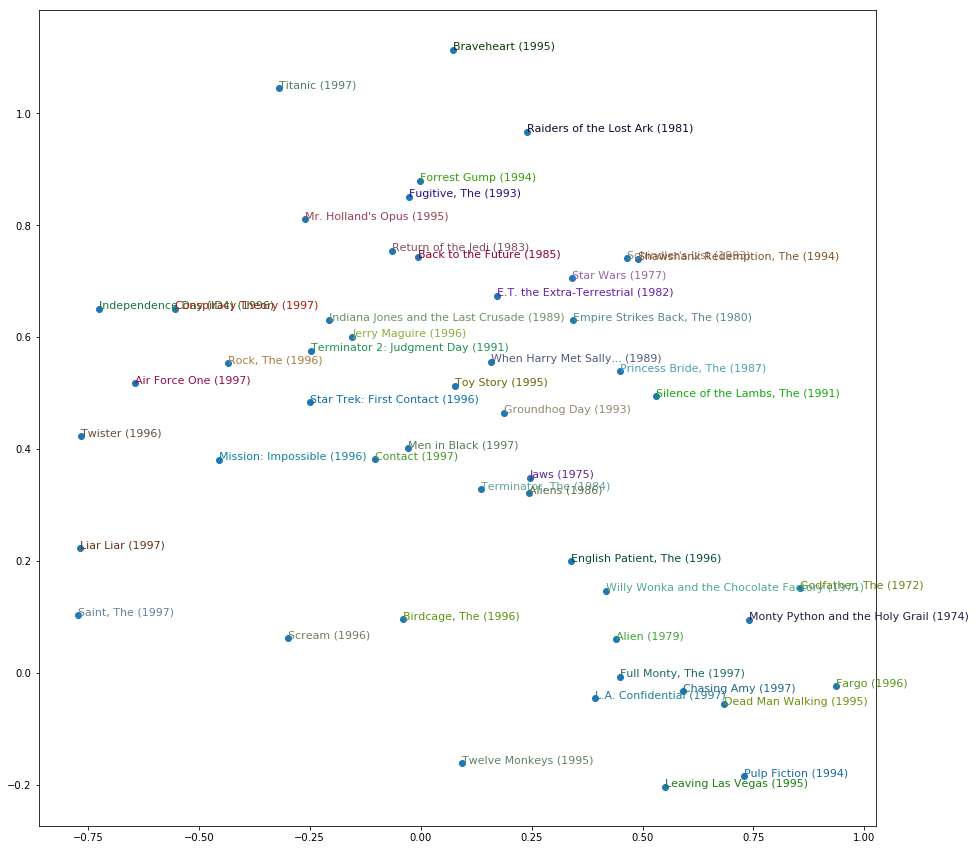

In [125]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

<Figure size 1080x1080 with 0 Axes>

Text(0.340938,-0.511451,'Star Wars (1977)')

Text(-0.102525,-0.145099,'Contact (1997)')

Text(0.935856,-0.18518,'Fargo (1996)')

Text(-0.0635445,-0.379695,'Return of the Jedi (1983)')

Text(-0.767047,-0.146417,'Liar Liar (1997)')

Text(0.339798,0.541168,'English Patient, The (1996)')

Text(-0.299139,-0.740485,'Scream (1996)')

Text(0.0765544,-0.024825,'Toy Story (1995)')

Text(-0.643633,-0.234482,'Air Force One (1997)')

Text(-0.724267,-0.264722,'Independence Day (ID4) (1996)')

Text(0.240344,-0.590098,'Raiders of the Lost Ark (1981)')

Text(0.855583,-0.440593,'Godfather, The (1972)')

Text(0.729712,-0.780115,'Pulp Fiction (1994)')

Text(0.0920255,-0.546747,'Twelve Monkeys (1995)')

Text(0.531449,-0.0363509,'Silence of the Lambs, The (1991)')

Text(-0.154609,-0.185112,'Jerry Maguire (1996)')

Text(0.592047,-0.413953,'Chasing Amy (1997)')

Text(-0.433718,-0.627934,'Rock, The (1996)')

Text(0.343294,-0.634544,'Empire Strikes Back, The (1980)')

Text(-0.248524,-0.426302,'Star Trek: First Contact (1996)')

Text(-0.00699195,-0.413463,'Back to the Future (1985)')

Text(-0.319019,-0.411782,'Titanic (1997)')

Text(-0.453549,-0.174026,'Mission: Impossible (1996)')

Text(-0.027387,-0.323691,'Fugitive, The (1993)')

Text(-0.207073,-0.244582,'Indiana Jones and the Last Crusade (1989)')

Text(0.41777,-0.0335309,'Willy Wonka and the Chocolate Factory (1971)')

Text(0.449364,-0.297801,'Princess Bride, The (1987)')

Text(-0.00120154,-0.0459481,'Forrest Gump (1994)')

Text(0.739893,-0.264136,'Monty Python and the Holy Grail (1974)')

Text(-0.771854,-0.152534,'Saint, The (1997)')

Text(0.448673,0.409392,'Full Monty, The (1997)')

Text(-0.0282468,-0.332349,'Men in Black (1997)')

Text(0.136911,-0.820839,'Terminator, The (1984)')

Text(0.172086,0.292457,'E.T. the Extra-Terrestrial (1982)')

Text(0.684415,-0.0167269,'Dead Man Walking (1995)')

Text(0.46537,0.193351,"Schindler's List (1993)")

Text(0.550693,-0.290001,'Leaving Las Vegas (1995)')

Text(0.0736811,-0.230996,'Braveheart (1995)')

Text(0.392109,-0.417931,'L.A. Confidential (1997)')

Text(-0.246437,-0.652292,'Terminator 2: Judgment Day (1991)')

Text(-0.5527,-0.18182,'Conspiracy Theory (1997)')

Text(-0.259876,0.109205,"Mr. Holland's Opus (1995)")

Text(-0.0395489,0.178134,'Birdcage, The (1996)')

Text(-0.765931,-0.349135,'Twister (1996)')

Text(0.439204,-0.372076,'Alien (1979)')

Text(0.15921,0.258092,'When Harry Met Sally... (1989)')

Text(0.244649,-0.457082,'Aliens (1986)')

Text(0.490449,-0.240823,'Shawshank Redemption, The (1994)')

Text(0.188378,-0.0495427,'Groundhog Day (1993)')

Text(0.246326,-0.283065,'Jaws (1975)')

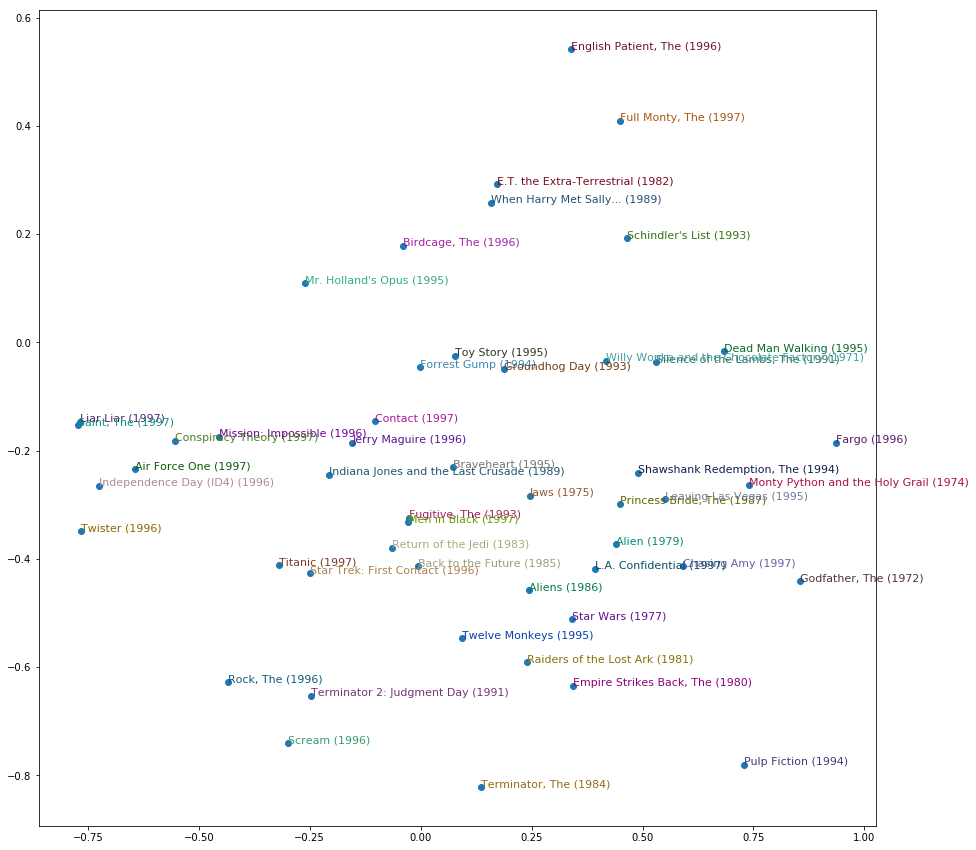

In [126]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

<Figure size 1080x1080 with 0 Axes>

Text(0.705768,-0.511451,'Star Wars (1977)')

Text(0.382035,-0.145099,'Contact (1997)')

Text(-0.0236502,-0.18518,'Fargo (1996)')

Text(0.753905,-0.379695,'Return of the Jedi (1983)')

Text(0.223887,-0.146417,'Liar Liar (1997)')

Text(0.199404,0.541168,'English Patient, The (1996)')

Text(0.0623446,-0.740485,'Scream (1996)')

Text(0.513481,-0.024825,'Toy Story (1995)')

Text(0.518164,-0.234482,'Air Force One (1997)')

Text(0.650071,-0.264722,'Independence Day (ID4) (1996)')

Text(0.967014,-0.590098,'Raiders of the Lost Ark (1981)')

Text(0.152271,-0.440593,'Godfather, The (1972)')

Text(-0.184257,-0.780115,'Pulp Fiction (1994)')

Text(-0.160883,-0.546747,'Twelve Monkeys (1995)')

Text(0.494251,-0.0363509,'Silence of the Lambs, The (1991)')

Text(0.600517,-0.185112,'Jerry Maguire (1996)')

Text(-0.0326163,-0.413953,'Chasing Amy (1997)')

Text(0.553702,-0.627934,'Rock, The (1996)')

Text(0.630153,-0.634544,'Empire Strikes Back, The (1980)')

Text(0.483882,-0.426302,'Star Trek: First Contact (1996)')

Text(0.743508,-0.413463,'Back to the Future (1985)')

Text(1.04493,-0.411782,'Titanic (1997)')

Text(0.380424,-0.174026,'Mission: Impossible (1996)')

Text(0.85076,-0.323691,'Fugitive, The (1993)')

Text(0.630275,-0.244582,'Indiana Jones and the Last Crusade (1989)')

Text(0.146801,-0.0335309,'Willy Wonka and the Chocolate Factory (1971)')

Text(0.538911,-0.297801,'Princess Bride, The (1987)')

Text(0.879214,-0.0459481,'Forrest Gump (1994)')

Text(0.0951735,-0.264136,'Monty Python and the Holy Grail (1974)')

Text(0.103428,-0.152534,'Saint, The (1997)')

Text(-0.00639626,0.409392,'Full Monty, The (1997)')

Text(0.402174,-0.332349,'Men in Black (1997)')

Text(0.329183,-0.820839,'Terminator, The (1984)')

Text(0.674304,0.292457,'E.T. the Extra-Terrestrial (1982)')

Text(-0.0559105,-0.0167269,'Dead Man Walking (1995)')

Text(0.741848,0.193351,"Schindler's List (1993)")

Text(-0.2028,-0.290001,'Leaving Las Vegas (1995)')

Text(1.11377,-0.230996,'Braveheart (1995)')

Text(-0.0439942,-0.417931,'L.A. Confidential (1997)')

Text(0.575412,-0.652292,'Terminator 2: Judgment Day (1991)')

Text(0.650456,-0.18182,'Conspiracy Theory (1997)')

Text(0.810551,0.109205,"Mr. Holland's Opus (1995)")

Text(0.0962184,0.178134,'Birdcage, The (1996)')

Text(0.423289,-0.349135,'Twister (1996)')

Text(0.0606471,-0.372076,'Alien (1979)')

Text(0.556092,0.258092,'When Harry Met Sally... (1989)')

Text(0.321315,-0.457082,'Aliens (1986)')

Text(0.738996,-0.240823,'Shawshank Redemption, The (1994)')

Text(0.465266,-0.0495427,'Groundhog Day (1993)')

Text(0.3484,-0.283065,'Jaws (1975)')

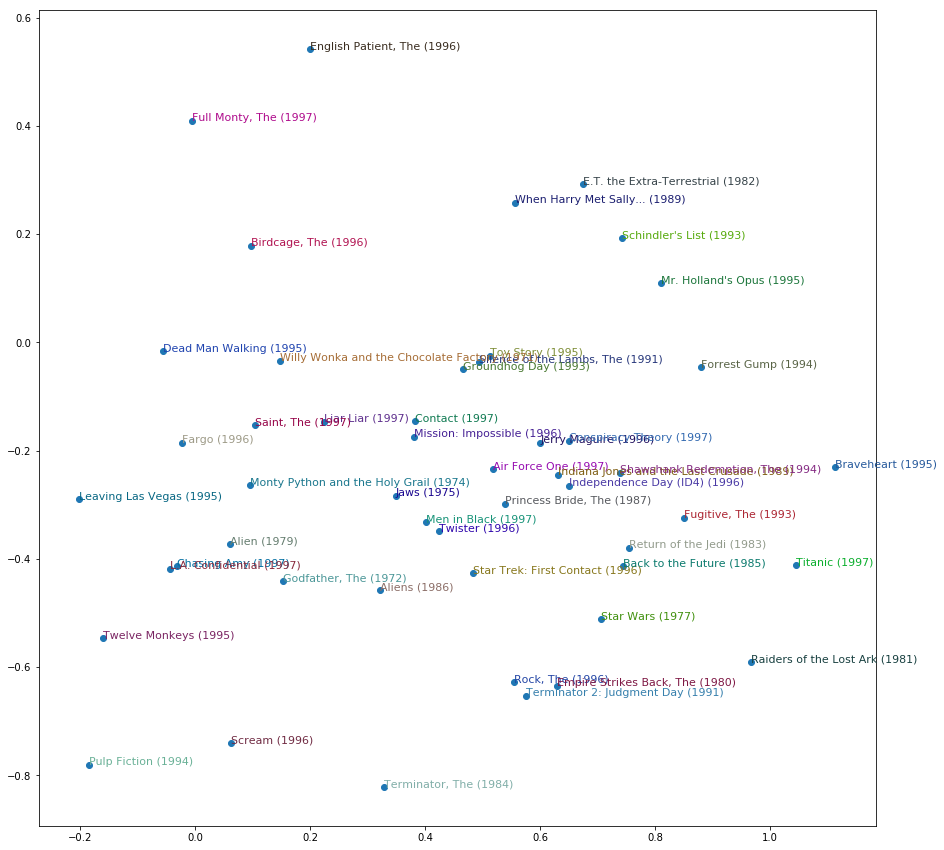

In [127]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac1[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## 使用网络进行训练

In [270]:
learn1 = collab_learner(data, n_factors=40, use_nn=True, layers=[32, 16], y_range=y_range, emb_szs={'item': 30, 'user': 40}, ps=0.1)

In [271]:
learn1.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(944, 40)
    (1): Embedding(1654, 102)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=142, out_features=32, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [272]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


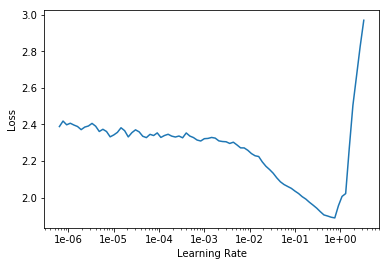

In [273]:
learn1.recorder.plot()

In [274]:
lr = 5e-2

In [275]:
learn1.fit_one_cycle(7, lr)

epoch,train_loss,valid_loss,time
0,0.965407,0.980594,00:06
1,0.972304,0.995500,00:06
2,0.962234,0.969875,00:06
3,0.904543,0.910469,00:06
4,0.871132,0.877338,00:07
5,0.847709,0.863785,00:06
6,0.793377,0.866301,00:06


In [218]:
err = 0.91**2
err

0.8281000000000001

- 学习率的默认初始值为 0.003 权重衰减为 0.1 or 0.001

- 学习器的超类

In [277]:
doc(Learner)

class Learner [source] [test] Learner ( data : DataBunch , model : Module , opt_func : Callable = 'Adam' , loss_func : Callable = None , metrics : Collection [ Callable ]= None , true_wd : bool = True , bn_wd : bool = True , wd : Floats = 0.01 , train_bn : bool = True , path : str = None , model_dir : PathOrStr = 'models' , callback_fns : Collection [ Callable ]= None , callbacks : Collection [ Callback ]= <factory> , layer_groups : ModuleList = None , add_time : bool = True , silent : bool = None ) 
 
 × No tests found for Learner . To contribute a test please refer to this guide and this discussion . Trainer for model using data to minimize loss_func with optimizer opt_func . 
 Show in docs